In [1]:
import numpy as np

### 직선상에 있지 않은 세 점을 직선으로 표현하기(예제의 직선은 원점을 지난다고 가정)
- 직선으로만 표현한다면 각 점(데이터)과 직선(구하고자 하는 모델) 사이의 에러가 제일 작도록 설정
- cost function : 에러를 표현하는 도구
- 각각의 에러를 구하고 제곱한(= 부호를 없애기 위해) 후 평균을 구한다
- 에러는 작을 수록 좋으므로 cost function 값을 최소화할 수 있다면 최적의 직선을 찾을 수 있다

### cost function
- $h_θ(x)$ = $θx$
- $x_1$ = (2, 1), $x_2$ = (3, 5), $x_3$ = (5, 6)
- 각각의 에러 : $h_θ(2) - 1$, $h_θ(3) - 5$, $h_θ(5) - 6$
- 각각의 에러의 제곱 :  $(h_θ(2) - 1)^2$, $(h_θ(3) - 5)^2$, $(h_θ(5) - 6)^2$
- 각각의 에러의 제곱의 평균(cost function) : 1/3{$(h_θ(2) - 1)^2$ + $(h_θ(3) - 5)^2$ + $(h_θ(5) - 6)^2$}

In [10]:
np.poly1d([2, -1])**2 + np.poly1d([3, -5])**2 + np.poly1d([5, -6])**2
# 상기 식을 파이썬(numpy)을 통해 식 만들기, 숫자의 간결함을 위하여 3으로 나누지는 않음

poly1d([ 38, -94,  62])

### $J(θ) = 38θ^2 - 94θ + 62$ 의 최소값 찾기

In [11]:
# !pip install sympy

In [7]:
import sympy as sym

theta = sym.Symbol('theta')
diff_th = sym.diff(38*theta**2 - 94*theta + 62, theta)
# 상기 poly1d로 구한 함수식 ([ 38, -94,  62])에 대하여 미분(sym.diff)하기(최소값 찾기) 
diff_th

76*theta - 94

In [12]:
# θ = 94 / 76
94 / 76

1.236842105263158

### gradient descent : 미분을 통해서 cost function의 최소값을 찾는다

### 다변수 데이터에 대한 회귀

In [7]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_pd = pd.DataFrame(data, columns=columns)
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 데이터프레임 항목 확인
- CRIM : 범죄율, ZN : 25,000평방 피트를 초과 거주지역 비율, INDUS : 비소매상업지역 면적 비율
- CHAS : 찰스강의 경계에 위치한 경우 1, 아니면 0, NOX : 일산화질소 농도, RM : 주택당 방수, AGE : 1940년 이전에 건축된 주택의 비율
- DIS : 직업센터의 거리, RAD : 방사형 고속도로까지의 거리, TAX : 재산세율, PTRATIO : 학생/교사 비율
- B : 인구 중 흑인 비율, LSTAT : 인구 중 하위 계층 비율, PRICE : 가격

### PRICE에 대한 histogram

In [8]:
import plotly_express as px

fig = px.histogram(boston_pd, x = 'PRICE')
fig.show()

### 각 특성별 상관계수
- 상관계수는 0.2 이상의 상관계수는 의미가 있다고 판단
- price와 상관계수가 높은(0.7, -0.7) 항목들은 RM(주택당 방수), LSTAT(인구 중 하위 계층 비율)

<Axes: >

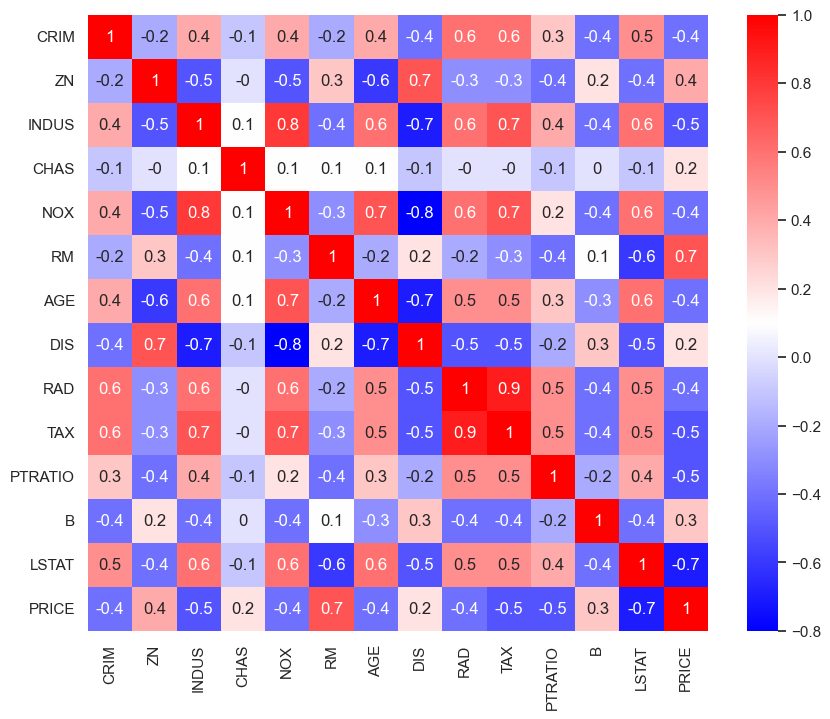

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_mat = boston_pd.corr().round(1)
# .corr() : 상관계수를 보여주는 명령어, .round() : 반올림 명령어
sns.set(rc={'figure.figsize' : (10, 8)})
sns.heatmap(data=corr_mat, annot=True, cmap='bwr')

<Axes: xlabel='LSTAT', ylabel='PRICE'>

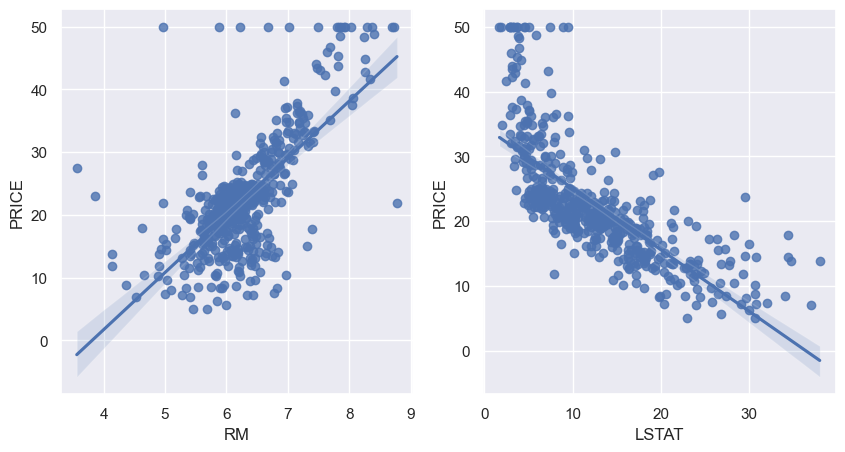

In [17]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize' : (10, 5)})
fig, ax = plt.subplots(ncols=2)
sns.regplot(x='RM', y='PRICE', data=boston_pd, ax=ax[0])
sns.regplot(x='LSTAT', y='PRICE', data=boston_pd, ax=ax[1])

##### 상기 표에 의하면 방의 개수가 많아지고 하위 계층 비율 적을 수록 집값은 높게 책정된다 -> 확인 필요

### 데이터를 나누고 선형회귀(LinearRegression) 학습

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = boston_pd.drop('PRICE', axis=1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### 모델 평가
- 선형회귀 평가는 주로 mean_squared_error 사용

In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE of train : ', rmse_tr)
print('RMSE of test : ', rmse_test)

rmse of train :  4.642806069019824
rmse of test :  4.931352584146716


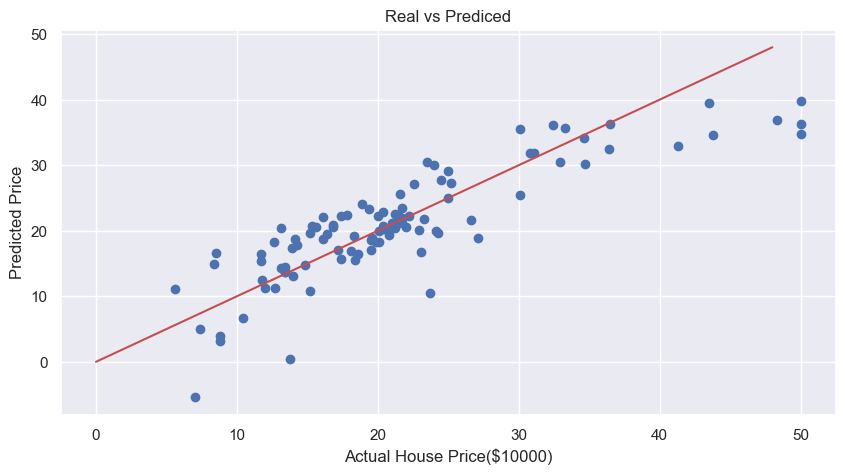

In [26]:
plt.scatter(y_test, pred_test)
# 참값과 얘측값을 X축, Y축으로 표현
plt.xlabel('Actual House Price($10000)')
plt.ylabel('Predicted Price')
plt.title('Real vs Prediced')
plt.plot([0, 48], [0, 48], 'r')
plt.show()

##### 참값이 높게 측정된 부분을 선형모델은 제대로 예측하지 못했다 -> 다른 경우의 수도 생각해보자

### LSTAT 특성으로서의 고민, 데이터를 나누고 선형회귀(LinearRegression) 학습

In [33]:
X = boston_pd.drop(['PRICE', 'LSTAT'], axis=1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [34]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE of train : ', rmse_tr)
print('RMSE of test : ', rmse_test)

RMSE of train :  5.165137874244864
RMSE of test :  5.2955950325971655


##### RMSE 값이 커졌으므로 성능은 나빠졌다 하지만 과연 LSTAT를 특성에서 제외시키는 것이 맞는지는 계속 고민해봐야 된다

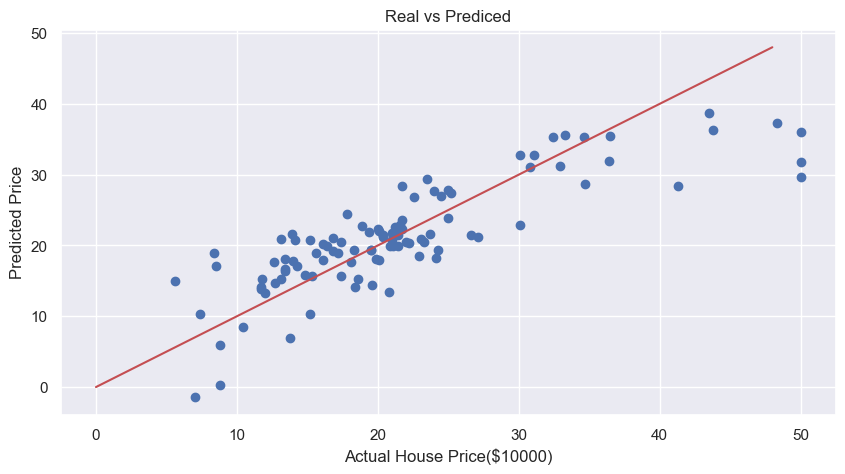

In [35]:
plt.scatter(y_test, pred_test)
# 참값과 얘측값을 X축, Y축으로 표현
plt.xlabel('Actual House Price($10000)')
plt.ylabel('Predicted Price')
plt.title('Real vs Prediced')
plt.plot([0, 48], [0, 48], 'r')
plt.show()